In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [49]:

train_data = pd.read_csv('train-clean.csv',delimiter=',')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29210 entries, 0 to 29209
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                29210 non-null  float64
 1   job_type                    29210 non-null  int64  
 2   marital                     29210 non-null  int64  
 3   education                   29210 non-null  int64  
 4   default                     29210 non-null  int64  
 5   balance                     29210 non-null  float64
 6   housing_loan                29210 non-null  int64  
 7   personal_loan               29210 non-null  int64  
 8   month                       29210 non-null  int64  
 9   last_contact_duration       29210 non-null  float64
 10  num_contacts_in_campaign    29210 non-null  float64
 11  num_contacts_prev_campaign  29210 non-null  int64  
 12  prev_campaign_outcome       29210 non-null  int64  
 13  term_deposit_subscribed     292

In [50]:
input_names = list(train_data.columns)
input_names.remove('term_deposit_subscribed')

all_inputs = train_data[input_names]
all_labels = train_data['term_deposit_subscribed']

In [51]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()

# Start the timer
start_time = time.time()

clf.fit(training_inputs, training_classes)

# End the timer and calculate the training time
training_time = time.time() - start_time

print("Training time: {:.2f} seconds".format(training_time))

Training time: 0.10 seconds


In [53]:
predictions = clf.predict(testing_inputs)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_classes,predictions)

0.8923729973983294

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(testing_classes, predictions)

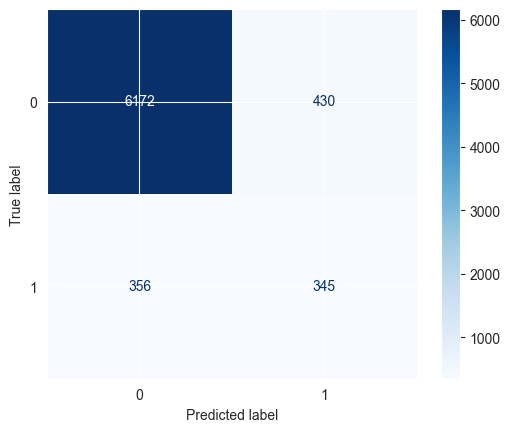

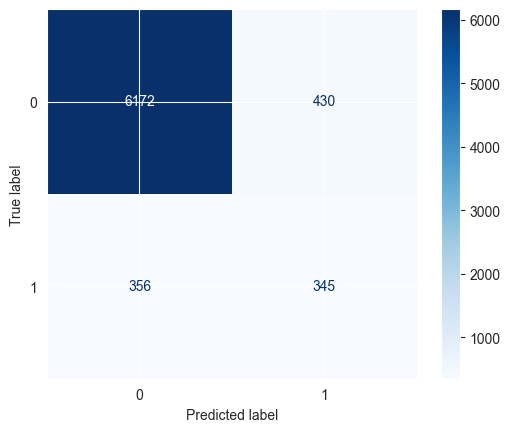

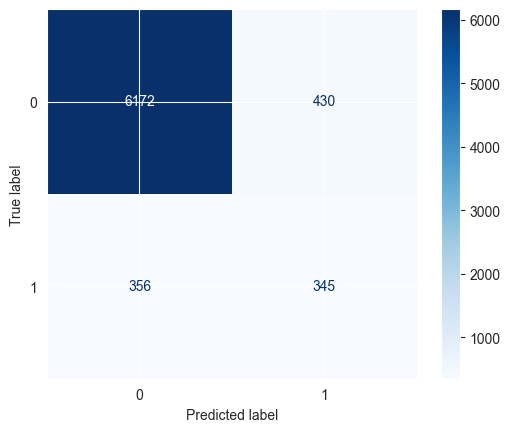

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_estimator(clf, testing_inputs, testing_classes).plot()
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap = 'Blues')
plt.show()

In [75]:
#from sklearn import tree
#from matplotlib import pyplot as plt

#feature_names = train_data.columns
#fig = plt.figure(figsize=(40,40))
#_ = tree.plot_tree(clf,feature_names=feature_names,class_names={0:'Subscribed',1:'NotSubscribed'},filled=True,fontsize=4)

In [58]:
feature_names = input_names
feature_names

['customer_age',
 'job_type',
 'marital',
 'education',
 'default',
 'balance',
 'housing_loan',
 'personal_loan',
 'month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign',
 'prev_campaign_outcome',
 'mid_month']

In [59]:
clf.feature_importances_

array([0.12662266, 0.04501132, 0.0181139 , 0.03115179, 0.00247   ,
       0.14422638, 0.02221042, 0.01088633, 0.11656408, 0.31777216,
       0.03846407, 0.03315875, 0.06927158, 0.02407657])

In [60]:
feature_importance = pd.DataFrame(clf.feature_importances_, index =feature_names).sort_values(0, ascending=False)
feature_importance

,0
last_contact_duration,0.317772
balance,0.144226
customer_age,0.126623
month,0.116564
prev_campaign_outcome,0.069272
job_type,0.045011
num_contacts_in_campaign,0.038464
num_contacts_prev_campaign,0.033159
education,0.031152
mid_month,0.024077


<Axes: >

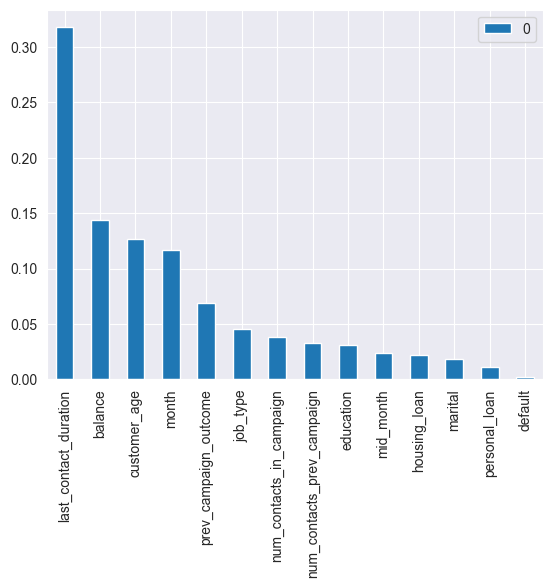

In [61]:
feature_importance.head(14).plot(kind='bar')

(array([  6.,  26.,  98., 165., 237., 213., 160.,  69.,  22.,   4.]),
 array([0.87744762, 0.87957004, 0.88169246, 0.88381487, 0.88593729,
        0.8880597 , 0.89018212, 0.89230453, 0.89442695, 0.89654936,
        0.89867178]),
 <BarContainer object of 10 artists>)

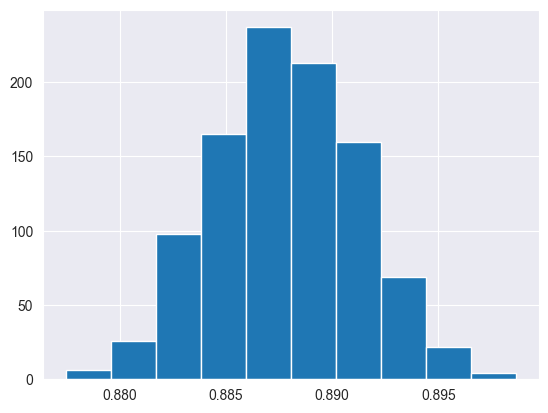

In [62]:
%matplotlib inline

import matplotlib.pyplot as plt


model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.8894214310167751')

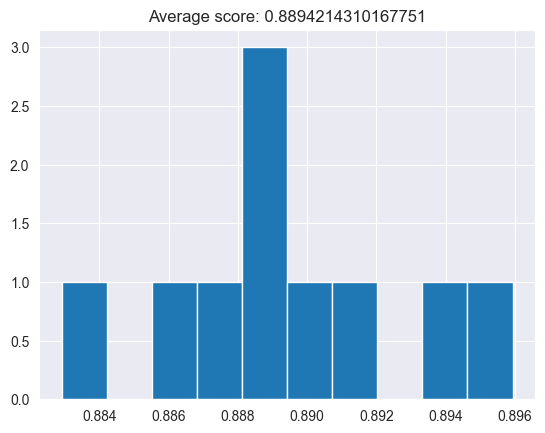

In [63]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [64]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [3, 5, 8, 11, 14, 17, 20],
                  'max_features': [7, 8, 9, 10, 11, 12, 13, 14]}



grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=10)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9148921602191029
Best parameters: {'max_depth': 5, 'max_features': 12}


Text(50.722222222222214, 0.5, 'max_depth')

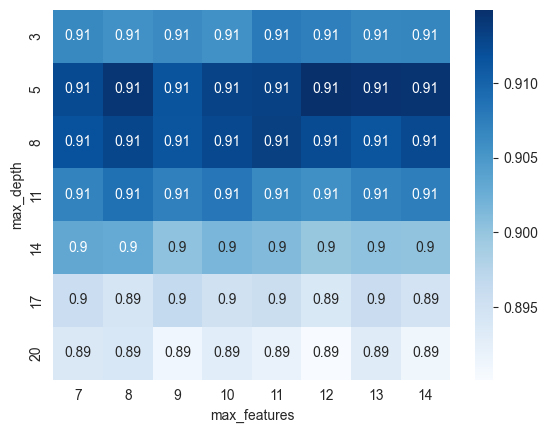

In [65]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (7, 8)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(8) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(7) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [66]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                  'splitter': ['best', 'random'],
                  'max_depth': [3, 5, 8, 11, 14, 17, 20],
                  'max_features': [7, 8, 9, 10, 11, 12, 13, 14]}


grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=10)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Best score: 0.915919205751455
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=11)


In [67]:
input_names.remove('default')
input_names.remove('personal_loan')
input_names.remove('num_contacts_prev_campaign')

all_inputs = train_data[input_names]


In [68]:

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [69]:
clf= DecisionTreeClassifier()
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier()

In [70]:
predictions = clf.predict(testing_inputs)
accuracy_score(testing_classes,predictions)

0.8922360673695742

In [77]:
from sklearn.metrics import classification_report

print(classification_report(testing_classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6602
           1       0.44      0.49      0.47       701

    accuracy                           0.89      7303
   macro avg       0.69      0.71      0.70      7303
weighted avg       0.90      0.89      0.89      7303



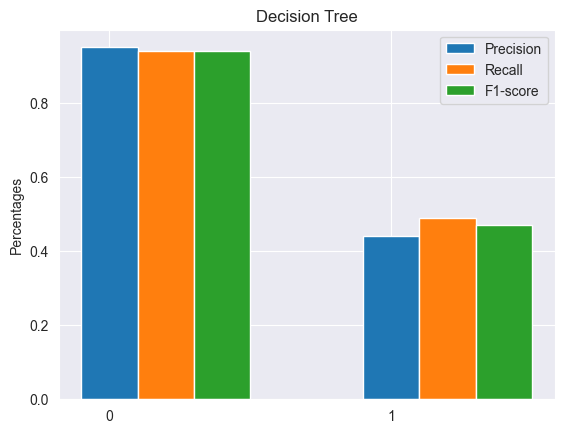

In [81]:
x = np.array([0, 1])  # Values 0 and 1
y1 = np.array([0.95, 0.44])  # Values for the first column
y2 = np.array([0.94, 0.49])  # Values for the second column
y3 = np.array([0.94, 0.47])  # Values for the third column

plt.bar(x, y1, width=0.2, align='center', label='Precision')
plt.bar(x + 0.2, y2, width=0.2, align='center', label='Recall')
plt.bar(x + 0.4, y3, width=0.2, align='center', label='F1-score')

plt.xticks(x, ['0', '1'])  # Set the x-tick labels
plt.ylabel('Percentages')

plt.legend()
plt.title('Decision Tree')

#Add text annotations on top of each bar
for i, v in enumerate(y1):
    plt.text(i - 0.1, v + 0.01, str(v), color='black', fontweight='bold')
for i, v in enumerate(y2):
    plt.text(i + 0.1, v + 0.01, str(v), color='black', fontweight='bold')
for i, v in enumerate(y3):
    plt.text(i + 0.3, v + 0.01, str(v), color='black', fontweight='bold')

plt.show()  # Display the plot

<Axes: >

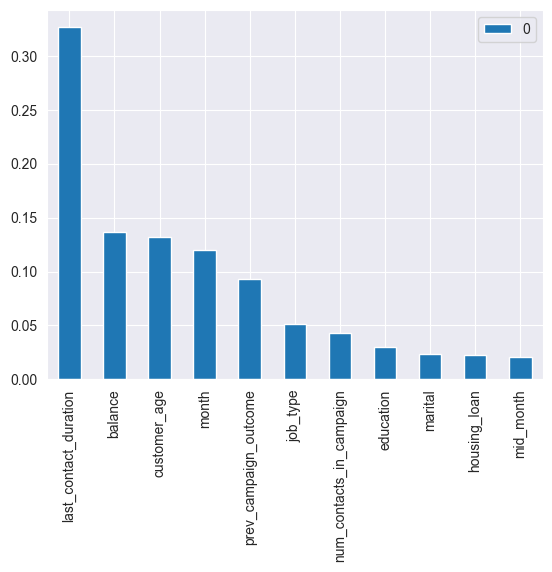

In [71]:
feature_names = input_names
feature_importance = pd.DataFrame(clf.feature_importances_, index =feature_names).sort_values(0, ascending=False)
feature_importance.head(11).plot(kind='bar')

In [72]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                  'splitter': ['best', 'random'],
                  'max_depth': [3, 5, 8, 11, 14, 17, 20],
                  'max_features': [7, 8, 9, 10, 11]}


grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=10)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Best score: 0.9157137966449846
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=11)
